## Ejemplo de espectrograma usando la transformada de Gabor
## Ecuaciones
La transformada de Gabor es una herramienta utilizada para analizar señales en el dominio del tiempo y la frecuencia. Se define como:
$$G_x(t, f) = \int_{-\infty}^{\infty} x(\tau) g(\tau - t) e^{-j 2 \pi f \tau} d\tau$$
donde:
- $x(t)$ es la señal de entrada.
- $g(t)$ es la ventana de Gabor, que se define como:
$$g(t) = e^{-t^2 / (2 \sigma^2)} e^{j 2 \pi f_0 t}$$
- $\sigma$ es el ancho de la ventana.
- $f_0$ es la frecuencia central de la ventana.

El sonido que vamos a analizar es una señal llamada "chirp", que varía su frecuencia linealmente con el tiempo:
$$x(t) = \cos(2 \pi t (f_0 + (f_l - f_0)) + \phi)$$
donde:
- $f_0$ es la frecuencia inicial.
- $f_l$ es la frecuencia final.
- $\phi$ es la fase inicial.


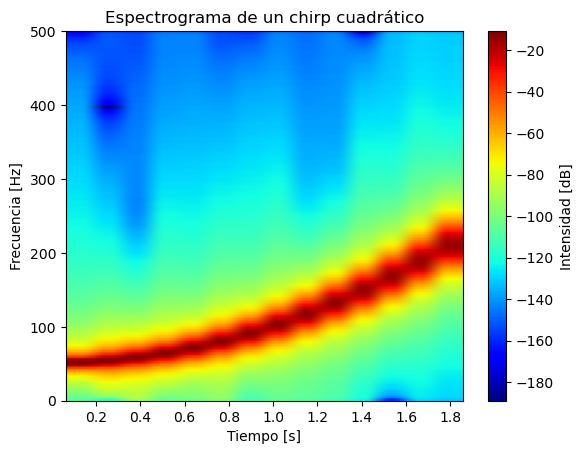

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as signal
import sounddevice as sd

dt = 0.001
f0 = 50 # frecuencia fundamental
fl = 250 # frecuencia final
tl = 2 # 2 segundos
t = np.arange(0, tl, dt)
phi = 0 # fase inicial
x = signal.chirp(t, f0=f0, t1=tl, f1=fl, method='quadratic', phi=phi)
sd.play(x, samplerate=int(1/dt))
plt.specgram(x, NFFT=256, Fs=1/dt, noverlap=128, cmap='jet')
plt.title('Espectrograma de un chirp cuadrático')
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.colorbar(label='Intensidad [dB]')
plt.show()